In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('../Data/CancerCvs.csv', sep=';')

In [7]:
def null_percentage(df):
    """
    Returns a DataFrame with the percentage of null (NaN) values per column.
    """
    percentage = df.isnull().mean() * 100
    return percentage.to_frame(name='Null Percentage')


def zero_percentage(df):
    """
    Returns a DataFrame with the percentage of zero values per column.
    """
    percentage = (df == 0).mean() * 100
    return percentage.to_frame(name='Zero Percentage')

In [8]:
df = pd.read_csv('../Data/CancerCvs.csv', sep=';')
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,30/11/2020,Liver,II,Radiation,4/12/2020,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,10/10/2015,Leukemia,III,Surgery,5/11/2015,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,13/02/2018,Liver,III,Radiation,3/08/2018,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,4/02/2022,Lung,III,Radiation,13/03/2022,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,3/12/2019,Pancreatic,II,Chemotherapy,29/02/2020,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [9]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [10]:
null_percentage(df)

,Null Percentage
Patient_ID,0.00
Age,0.00
Gender,0.00
Nationality,0.00
Emirate,0.00
Diagnosis_Date,0.00
Cancer_Type,0.00
Cancer_Stage,0.00
Treatment_Type,0.00
Treatment_Start_Date,0.00


In [11]:
zero_percentage(df)

,Zero Percentage
Patient_ID,0.0
Age,0.0
Gender,0.0
Nationality,0.0
Emirate,0.0
Diagnosis_Date,0.0
Cancer_Type,0.0
Cancer_Stage,0.0
Treatment_Type,0.0
Treatment_Start_Date,0.0


In [12]:
df['Patient_ID'].value_counts()
# Alta varianza, por tanto se elimina

Patient_ID
PAT009984    1
PAT009983    1
PAT009982    1
PAT009981    1
PAT009980    1
            ..
PAT000005    1
PAT000004    1
PAT000003    1
PAT000002    1
PAT000001    1
Name: count, Length: 10000, dtype: int64

<Axes: xlabel='Diagnosis_Date'>

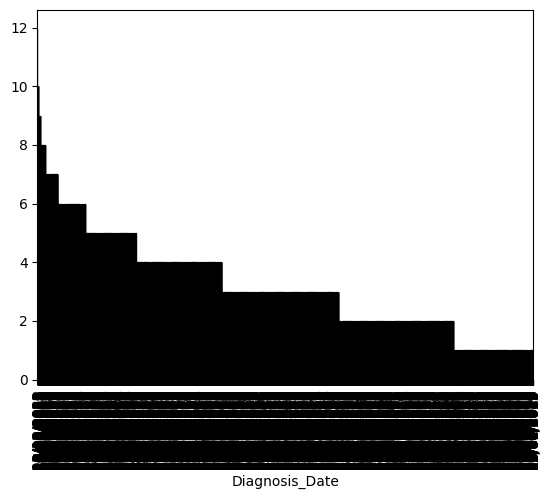

In [13]:
df['Diagnosis_Date'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

In [20]:
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce', dayfirst=True)

# Extraer el año y el mes
df['date'] = df['Diagnosis_Date'].dt.date
df['year'] = df['Diagnosis_Date'].dt.year
df['month'] = df['Diagnosis_Date'].dt.month

VARIABLE TARGET

C:\Users\Esteban\AppData\Local\Temp\ipykernel_26752\488727945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancer_Type', data=df, palette='pastel')


<Axes: xlabel='Cancer_Type', ylabel='count'>

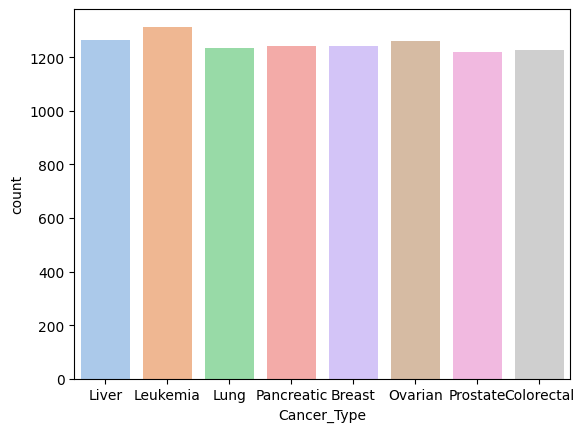

In [21]:
sns.countplot(x='Cancer_Type', data=df, palette='pastel')

In [22]:
df['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [23]:
print("tamaño antes" , df.shape[0])

tamaño antes 10000


In [49]:
df_clean = df[['Diagnosis_Date', 'Cancer_Type', 'Treatment_Type', 'Cancer_Stage']]

In [50]:
df_clean.head()

,Diagnosis_Date,Cancer_Type,Treatment_Type,Cancer_Stage
0,2020-11-30,Liver,Radiation,II
1,2015-10-10,Leukemia,Surgery,III
2,2018-02-13,Liver,Radiation,III
3,2022-02-04,Lung,Radiation,III
4,2019-12-03,Pancreatic,Chemotherapy,II


In [28]:
df_clean.columns

Index(['Diagnosis_Date', 'Cancer_Type', 'Treatment_Type', 'Cancer_Stage'], dtype='object')

NORMALIZACION

In [31]:
df_clean.dtypes

Diagnosis_Date    datetime64[ns]
Cancer_Type               object
Treatment_Type            object
Cancer_Stage              object
dtype: object

In [40]:
df_clean['Diagnosis_Year'] = df_clean['Diagnosis_Date'].dt.year

In [52]:
df_selected = df_clean[['Cancer_Type', 'Treatment_Type', 'Cancer_Stage']]
df_selected.head()

,Cancer_Type,Treatment_Type,Cancer_Stage
0,Liver,Radiation,II
1,Leukemia,Surgery,III
2,Liver,Radiation,III
3,Lung,Radiation,III
4,Pancreatic,Chemotherapy,II


In [53]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_selected.copy()
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
df_normalized.head()

,Cancer_Type,Treatment_Type,Cancer_Stage
0,-0.213778,0.445191,-0.360160
1,-0.652297,1.340769,0.632017
2,-0.213778,0.445191,0.632017
3,0.224741,0.445191,0.632017
4,1.101778,-1.345963,-0.360160


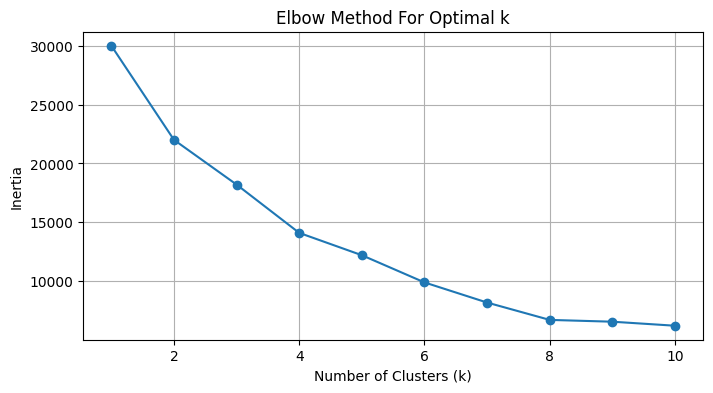

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

-El gráfico muestra cómo disminuye la inercia (variación interna) al aumentar el número de clústeres.
-El "codo" o punto de inflexión sugiere el número óptimo de grupos.
-A partir de ese punto, agregar más clústeres no mejora significativamente la agrupación.

In [64]:
from sklearn.cluster import KMeans

k = 2  # puedes cambiarlo según el codo que hayas visto
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_normalized)

# Añadir los clusters al DataFrame original
df_clustered = df_selected.copy()
df_clustered['cluster'] = kmeans.labels_

In [65]:
df_clustering['cluster'].value_counts()

cluster
0    5017
1    4983
Name: count, dtype: int64

In [68]:
df_clustered.groupby('cluster').agg({
    'Cancer_Type': pd.Series.mode,
    'Treatment_Type': pd.Series.mode,
    'Cancer_Stage': pd.Series.mode
})


,Cancer_Type,Treatment_Type,Cancer_Stage
cluster,,,
0,Ovarian,Radiation,II
1,Leukemia,Immunotherapy,III


In [72]:
pd.crosstab(df_clustered['cluster'], df_clustered['Cancer_Type'], normalize='index') * 100


Cancer_Type,Breast,Colorectal,Leukemia,Liver,Lung,Ovarian,Pancreatic,Prostate
cluster,,,,,,,,
0,12.517441,11.959338,12.437712,12.796492,12.298186,13.215069,12.856289,11.919474
1,12.301826,12.562713,13.847080,12.462372,12.362031,11.960666,12.000803,12.502509


In [73]:
pd.crosstab(df_clustered['cluster'], df_clustered['Treatment_Type'], normalize='index') * 100

Treatment_Type,Chemotherapy,Immunotherapy,Radiation,Surgery
cluster,,,,
0,0.000000,0.000000,50.209288,49.790712
1,49.889625,50.110375,0.000000,0.000000


In [77]:
pd.crosstab(df_clustered['cluster'], df_clustered['Cancer_Stage'], normalize='index') * 100

Cancer_Stage,I,II,III,IV
cluster,,,,
0,23.579829,31.472992,30.536177,14.411003
1,24.804335,29.239414,30.282962,15.673289


In [79]:
df_clean['Diagnosis_Date'] = pd.to_datetime(df_clean['Diagnosis_Date'], errors='coerce')
df_clean['Diagnosis_Year'] = df_clean['Diagnosis_Date'].dt.year

In [80]:
# y = lo que queremos predecir
y = df_clean['Cancer_Type']

# X = las variables que usamos para predecir
X = df_clean[['Diagnosis_Year', 'Treatment_Type', 'Cancer_Stage']]

In [81]:
from sklearn.preprocessing import LabelEncoder

# Codificamos y (Cancer_Type)
y = LabelEncoder().fit_transform(y.astype(str))

# Codificamos X
X_encoded = X.copy()
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))


In [ ]:
from sklearn.model_selection import train_test_split

# Paso 1: 80% para entrenamiento + validación, 20% para test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Paso 2: 80% de eso para entrenamiento, 20% para validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# Verifica tamaños si quieres:

print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test)}")

Train: 6400
Validation: 1600
Test: 2000


In [84]:
# Unir X e y para cada conjunto
train = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.Series(y_train, name='Cancer_Type')], axis=1)
val = pd.concat([pd.DataFrame(X_val, columns=X.columns), pd.Series(y_val, name='Cancer_Type')], axis=1)
test = pd.concat([pd.DataFrame(X_test, columns=X.columns), pd.Series(y_test, name='Cancer_Type')], axis=1)

# Guardar como CSV (ajusta la ruta si estás en Colab o local)
train.to_csv('../Data/train.csv', index=False)
val.to_csv('../Data/validation.csv', index=False)
test.to_csv('../Data/test.csv', index=False)
